# Airline Passenger Satisfaction

The following section loads the dataset and cleans the data using the following process:

1. Drop values that are not numbers.
2. Replace labels with numerical values.
3. Convert categorical columns to numerical using one hot encoding.
4. Remove columns thar are not necessary to train the model.

In [64]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data


In [65]:
%cd "/content/gdrive/MyDrive/Data"
!ls

/content/gdrive/MyDrive/Data
fertility_Diagnosis.txt  iris.names   passenger-satisfaction
iris.data		 obesity.csv  wine.data


In [66]:
import pandas as pd


def clean_data(df):
    categorical_cols = [
        'Gender',
        'Customer Type',
        'Type of Travel',
        'Class'
    ]

    df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
    y = pd.DataFrame({'labels': df['satisfaction'].replace(
        to_replace=['neutral or dissatisfied', 'satisfied'], value=[0, 1])})

    df = pd.get_dummies(df, columns=categorical_cols)
    df = df.drop(df.columns[0], axis=1)
    x = df.drop(columns=['id', 'satisfaction', 'Gate location'])

    return x, y

def load_data(path):
    data = pd.read_csv(path)
    return clean_data(data)


x, y = load_data('passenger-satisfaction/train.csv')
x_train, y_train = x[:100000], y[:100000]
x_val, y_val = x[100000:], y[100000:]
x_test, y_test = load_data('passenger-satisfaction/train.csv')

x_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,5,3,5,5,4,...,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,1,3,1,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,5,5,5,5,4,...,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,2,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,4,5,5,3,3,...,0.0,0,1,1,0,1,0,1,0,0


## Create Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=8)
model_dt.fit(x_train, y_train)
print(f'Model configuration: {model_dt}')


Model configuration: DecisionTreeClassifier(max_depth=8)


## Decision Tree Classifier Accuracy

In [68]:
from sklearn.metrics import accuracy_score

def get_accuracy(model, x, y):
    predictions = model.predict(x)
    return accuracy_score(y, predictions)


In [69]:
dt_validation_accuracy = get_accuracy(model_dt, x_val, y_val)
dt_test_accuracy = get_accuracy(model_dt, x_test, y_test)

print(f'Decision Tree Validation Accuracy: {dt_validation_accuracy}')
print(f'Decision Tree Test Accuracy: {dt_test_accuracy}')

Decision Tree Validation Accuracy: 0.924596549805231
Decision Tree Test Accuracy: 0.936598644709153


## Decision Tree Graph

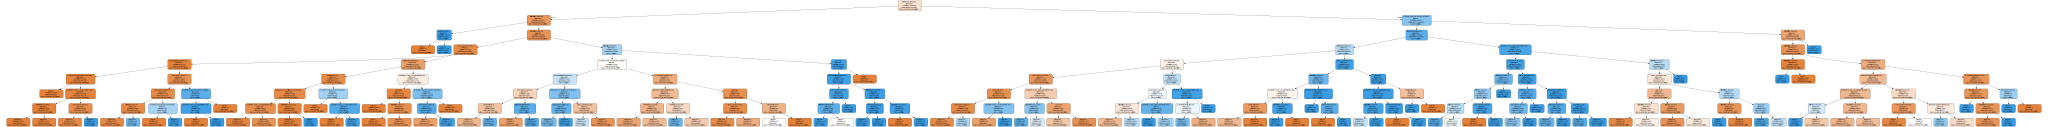

In [70]:
from sklearn import tree
import graphviz

dot = tree.export_graphviz(model_dt, out_file=None, 
                           feature_names=x_train.columns,
                           class_names=['neutral or dissatisfied', 'satisfied'],
                           filled=True, rounded=True,  
                           special_characters=True) 

graph = graphviz.Source(dot) 
graph


## Create Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model_rf.fit(x_train, y_train.values.ravel())


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

## Random Forest Accuracy

In [72]:
rf_validation_accuracy = get_accuracy(model_rf, x_val, y_val)
rf_test_accuracy = get_accuracy(model_rf, x_test, y_test)

print(f'Random Forest Validation Accuracy: {rf_validation_accuracy}')
print(f'Random Forest Test Accuracy: {rf_test_accuracy}')


Random Forest Validation Accuracy: 0.910962715637173
Random Forest Test Accuracy: 0.9150143830723787


## Create Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(n_jobs=-1, max_iter=500)
model_lr.fit(x_train, y_train.values.ravel())


LogisticRegression(max_iter=500, n_jobs=-1)

## Logistic Regression Accuracy

In [74]:
lr_validation_accuracy = get_accuracy(model_lr, x_val, y_val)
lr_test_accuracy = get_accuracy(model_lr, x_test, y_test)

print(f'Logistic Regression Validation Accuracy: {lr_validation_accuracy}')
print(f'Logistic Regression Test Accuracy: {lr_test_accuracy}')

Logistic Regression Validation Accuracy: 0.8567056204785755
Logistic Regression Test Accuracy: 0.8627912813483406


## Neural Network Classifier

In [75]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model_nn = Sequential([
    Input(shape=(26,)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),                                 
    Dense(2, activation="softmax", name="output")                                     
])
model_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                432       
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 output (Dense)              (None, 2)                 34        
                                                                 
Total params: 738
Trainable params: 738
Non-trainable params: 0
_________________________________________________________________


In [77]:
opt = tf.keras.optimizers.Adam(learning_rate=.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model_nn.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae]
              )

In [78]:
history = model_nn.fit(x_train, y_train, batch_size= 256, epochs= 20)

Epoch 1/20
391/391 [==============================] - 2s 2ms/step - loss: 1.8988 - sparse_categorical_accuracy: 0.6603 - mean_absolute_error: 0.5000
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.5730 - sparse_categorical_accuracy: 0.7887 - mean_absolute_error: 0.5000
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.5613 - sparse_categorical_accuracy: 0.8051 - mean_absolute_error: 0.5000
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.4870 - sparse_categorical_accuracy: 0.8226 - mean_absolute_error: 0.5000
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 0.4569 - sparse_categorical_accuracy: 0.8341 - mean_absolute_error: 0.5000
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 0.4115 - sparse_categorical_accuracy: 0.8467 - mean_absolute_error: 0.5000
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.4009 - sparse_categorical_accu

## Neural Network Accuracy

In [79]:
_, nn_validation_accuracy, _ = model_nn.evaluate(x_val, y_val)
_, nn_test_accuracy, _ = model_nn.evaluate(x_test, y_test)

print(f'Neural Network Validation Accuracy: {nn_validation_accuracy}')
print(f'Neural Network Test Accuracy: {nn_test_accuracy}')

3238/3238 [==============================] - 6s 2ms/step - loss: 0.2278 - sparse_categorical_accuracy: 0.9106 - mean_absolute_error: 0.5000
Neural Network Validation Accuracy: 0.9106844663619995
Neural Network Test Accuracy: 0.9105546474456787


## Accuracy Comparison

The model with the highest accuracy was the decision tree.

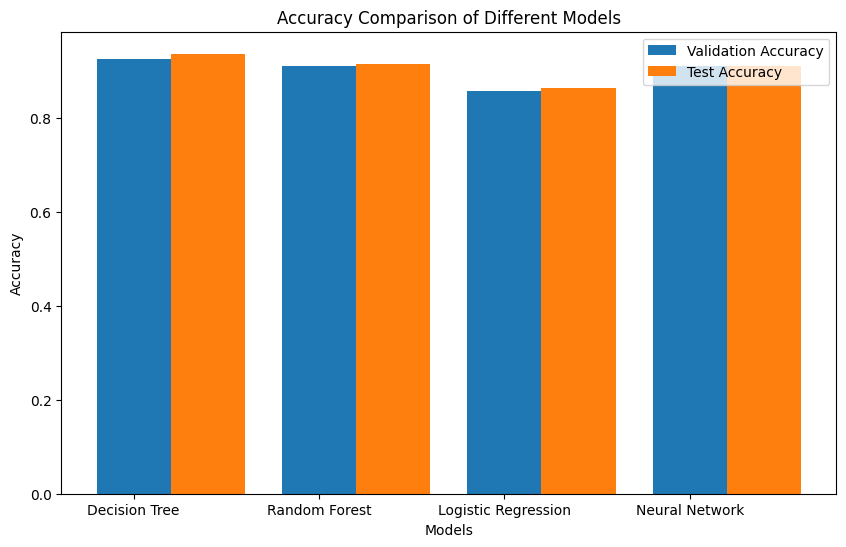

In [80]:
import matplotlib.pyplot as plt
 

models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Neural Network']
val_accuracy = [dt_validation_accuracy, rf_validation_accuracy, 
                lr_validation_accuracy, nn_validation_accuracy]
test_accuracy = [dt_test_accuracy, rf_test_accuracy, lr_test_accuracy,
                 nn_test_accuracy]
 

fig, ax = plt.subplots(figsize=(10, 6))
 
ax.bar(models, val_accuracy, width=0.4, label='Validation Accuracy')
ax.bar([i + 0.4 for i in range(len(models))], test_accuracy, width=0.4, 
       label='Test Accuracy')
 
ax.set_title('Accuracy Comparison of Different Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.legend()
 
plt.show()

## Making Predictions

For this, we can use the best model. In this case, it is the decission tree.

In [63]:
stop = False
while not stop:
        user_data = []
        print('----------------------')
        user_data.append(int(input('Age: ')))
        user_data.append(int(input('Flight Distance: ')))
        user_data.append(int(input('Inflight wifi service: ')))
        user_data.append(int(input('Departure/Arrival time convenient: ')))
        user_data.append(int(input('Ease of Online booking: ')))
        user_data.append(int(input('Food and drink: ')))
        user_data.append(int(input('Online boarding: ')))
        user_data.append(int(input('Seat comfort: ')))
        user_data.append(int(input('Inflight entertainment: ')))
        user_data.append(int(input('On-board service: ')))
        user_data.append(int(input('Leg room service: ')))
        user_data.append(int(input('Baggage handling: ')))
        user_data.append(int(input('Checkin service: ')))
        user_data.append(int(input('Inflight service: ')))
        user_data.append(int(input('Cleanliness: ')))
        user_data.append(int(input('Departure Delay in Minutes: ')))
        user_data.append(int(input('Arrival Delay in Minutes: ')))
        user_data.append(int(input('Gender Female: ')))
        user_data.append(int(input('Gender Male: ')))
        user_data.append(int(input('Loyal Customer: ')))
        user_data.append(int(input('Disloyal Customer: ')))
        user_data.append(int(input('Business travel: ')))
        user_data.append(int(input('Personal Travel: ')))
        user_data.append(int(input('Business: ')))
        user_data.append(int(input('Eco: ')))
        user_data.append(int(input('Eco Plus: ')))

        data = pd.DataFrame([user_data], columns=x_train.columns)
        prediction = model_dt.predict(data)

        print(f'Prediction: {"Satisfied" if prediction[0] == 1 else "Neutral or not satisfied"}')

        stop_input = input('Do you want to make another prediction? yes/no\n')
        stop = True if stop_input == 'no' else False

----------------------


KeyboardInterrupt: ignored